In [50]:
# Gerekli kütüphanelerin yüklenmesi

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
# Veri setinin yüklenmesi

df = pd.read_csv("titanic_train.csv")

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
# veri setinin boyutunu inceleyelim

df.shape

(891, 12)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Verimiz 891 gözlem ve 12 değişkenden oluşuyor.
- 2 float64, 5 int64, 5 object tipinde değişkenlerimiz bulunmaktadır.
- Eksik değerler bulunmaktadır.

In [55]:
# MISSING VALUE

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**MISSING VALUE:**

- Age (float64) = 177 eksik değer
- Cabin (object) = 687 eksik değer
- Embarked (object) = 2 eksik değer

olduğunu gözlemliyoruz.

In [56]:
# Age sütunundaki eksik değerleri dolduralım   -   Eksik değerleri doldurma (Yaş sütunu için ortalama kullanıldı)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [57]:
# Kategorik değişkenleri sayısal hale getirme   -     Sex ve Embarked değişkenlerini dönüştürelim


df = pd.get_dummies(df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'], drop_first=True)

In [58]:
df.corr()["Survived"].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16732\1509721473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked_S    -0.155660
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_16732\3548077051.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(), 1),


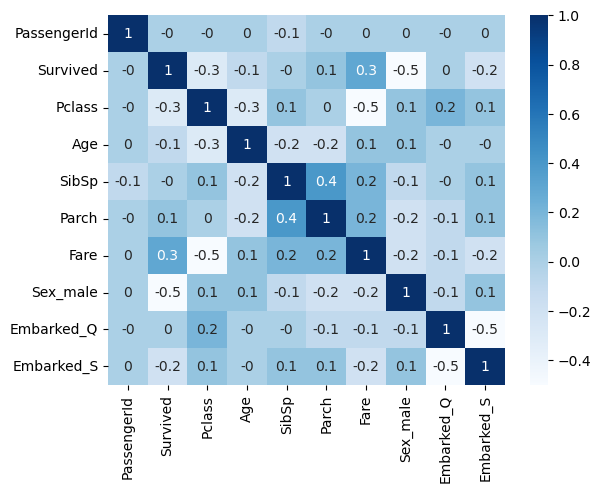

In [59]:
plt.figure(dpi=100)
sns.heatmap(
    np.round(df.corr(), 1),
    annot=True,
    cmap='Blues'
)
plt.show()

In [60]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,1,0,0


In [61]:
# Bağımsız değişkenleri belirleme (Multiple Linear Regression için birden fazla değişken seçiyoruz)

features = ['Age', 'Fare', 'Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']

In [62]:
# Normalizasyon ve dönüşüm

df_scaled = df.copy()
for col in features:
    stat, p = normaltest(df[col])
    if p < 0.5:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    df_scaled[col] = scaler.fit_transform(df[[col]])
    
    # Box-Cox, Log, Square Root dönüşümleri
    if (df[col] > 0).all():
        df_scaled[f'{col}_BoxCox'], _ = boxcox(df[col])
    df_scaled[f'{col}_Log'] = np.log1p(df[col])
    df_scaled[f'{col}_Sqrt'] = np.sqrt(df[col])


In [63]:
# Model için bağımsız ve bağımlı değişkenleri seçme

X = df_scaled[features]
y = df['Survived']


In [64]:
# Veriyi eğitim ve test setlerine ayırma

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Model eğitimi

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [66]:
# Tahminleme

y_pred = model.predict(X_test)

In [67]:
# Model performansı değerlendirme

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}, R^2 Score: {r2:.2f}')


MAE: 0.28, R^2 Score: 0.44


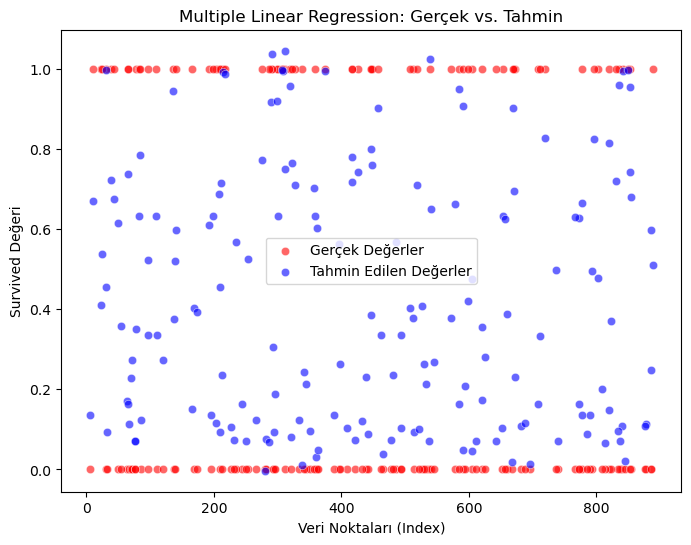

In [68]:
plt.figure(figsize=(8,6))

# Gerçek değerler (y_test)
sns.scatterplot(x=y_test.index, y=y_test, color='red', label='Gerçek Değerler', alpha=0.6)

# Tahmin edilen değerler (y_pred)
sns.scatterplot(x=y_test.index, y=y_pred, color='blue', label='Tahmin Edilen Değerler', alpha=0.6)

plt.xlabel('Veri Noktaları (Index)')
plt.ylabel('Survived Değeri')
plt.title('Multiple Linear Regression: Gerçek vs. Tahmin')
plt.legend()
plt.show()
